In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
treas = quandl.get("CHRIS/CME_TY1", authtoken=token).Last
stocks = quandl.get("CHRIS/CME_ES1", authtoken=token).Last

In [64]:
def tsmom(data,months):
    vol=pd.rolling_std(data.pct_change(),3*months)*math.sqrt(12)
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position

def ewma_mom(data,weeks):
    raw=pd.ewma(data,weeks)-pd.ewma(data,weeks*3)
    vol=pd.rolling_std(data.pct_change(),63)*math.sqrt(256)
    raw_vol = pd.rolling_std(raw,252)
    position = signal* np.exp(-(signal)**2/4.) / .89
    signal=(raw / vol)  / signal_vol
    return signal

def calc_pnl(position,data):
    return position*data.pct_change().shift(1)

def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

def ew_portfolio_pnl(pnl):
    return pnl.divide(pnl.count(axis=1),axis=0).sum(axis=1)

In [65]:
data=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).std()
  from IPython.kernel.zmq import kernelapp as app


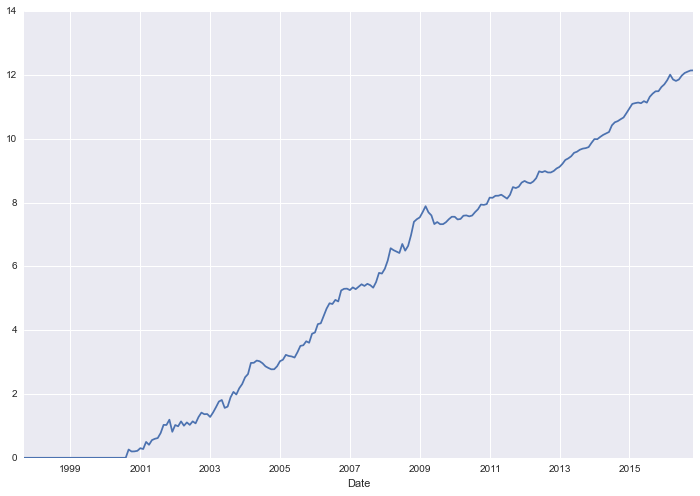

In [66]:
pos=tsmom(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)
ew_portfolio_pnl(pnl).cumsum().plot()

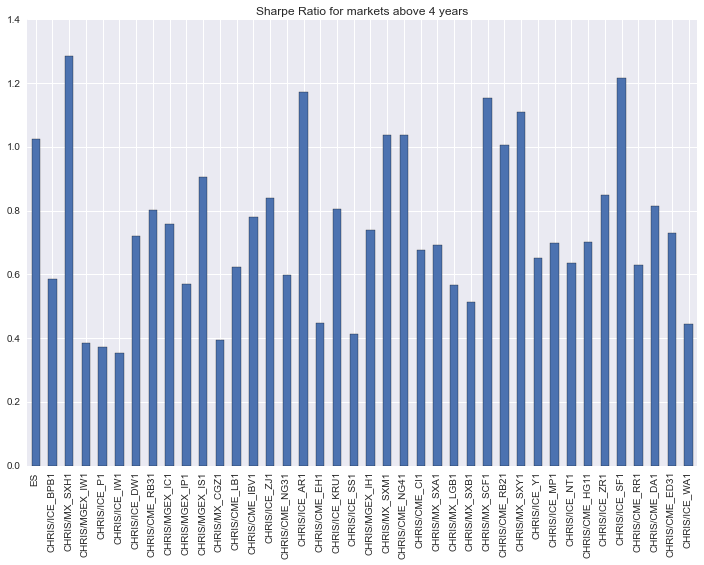

In [67]:
sr.loc[data.count()>48].plot(kind='bar',title='Sharpe Ratio for markets above 4 years')

In [68]:
volume = pd.DataFrame()
for i in sr.loc[data.count()>48].index:
    try:
        volume[i]=quandl.get(i, authtoken=token).Volume
    except:
        print i

ES


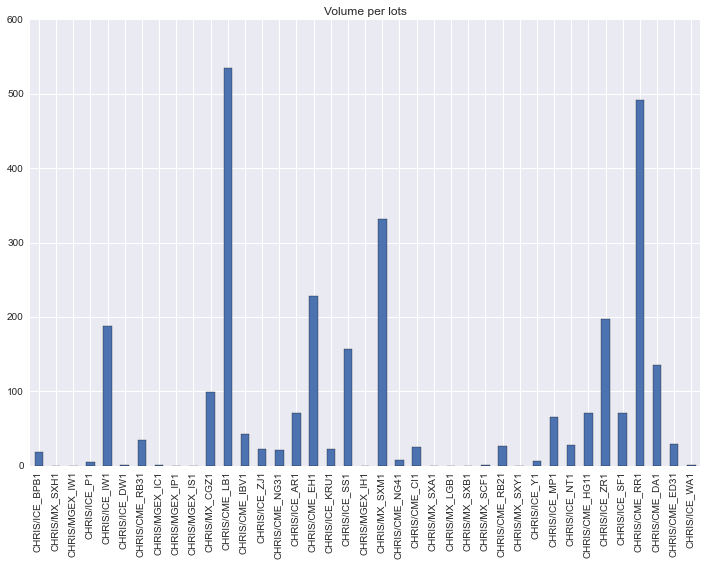

In [69]:
volume.mean().plot(kind='bar', title='Volume per lots')

In [72]:
volume.mean().to_csv('contracts.csv')

In [106]:
contract_dict=pd.read_csv('CHRIS-codes.csv',index_col=0).T.to_dict()
for code in volume.columns:
    try:
        print contract_dict[code].items()[0][1]
    except:
        print code

Endex Belgian Power Base Load Futures, Continuous Contract #1 (BPB1) (Front Month)
S&P/TSX Capped Information Technology Index Futures, Continuous Contract #1 (SXH1) (Front Month)
Minneapolis SRWI Soft Red Wheat Futures, Continuous Contract #1 (IW1) (Front Month)
10Yr Euro Swapnote Future, Continuous Contract #1 (P1) (Front Month)
Wheat Futures, Continuous Contract #1 (IW1) (Front Month)
Durum Wheat Futures, Continuous Contract #1 (DW1) (Front Month)
RBOB Gasoline Physical Futures, Continuous Contract #31 (RB31)
Minneapolis NCI National Corn Futures, Continuous Contract #1 (IC1) (Front Month)
Minneapolis HRSI Hard Red Spring Futures, Continuous Contract #1 (IP1) (Front Month)
Minneapolis NSI National Soybean Futures, Continuous Contract #1 (IS1) (Front Month)
Two-Year Government of Canada Bond Futures, Continuous Contract #1 (CGZ1) (Front Month)
Random Length Lumber Futures, Continuous Contract #1 (LB1) (Front Month)
Ibovespa Futures, Continuous Contract #1 (IBV1) (Front Month)
New Zea

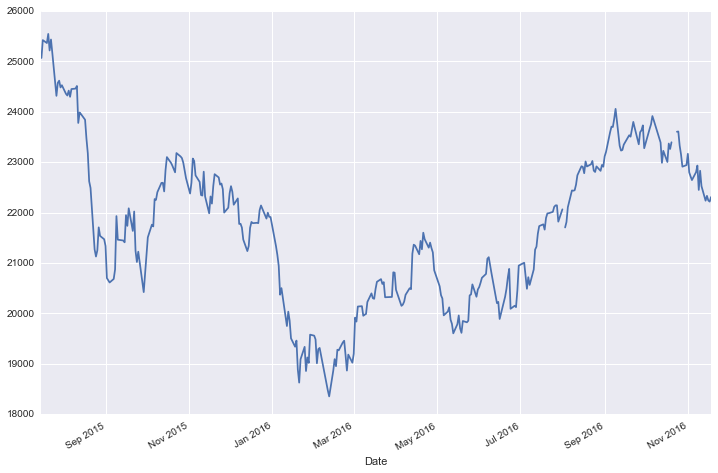

In [146]:
quandl.get('CHRIS/HKEX_HSI1', authtoken=token)['Last Traded'].plot()

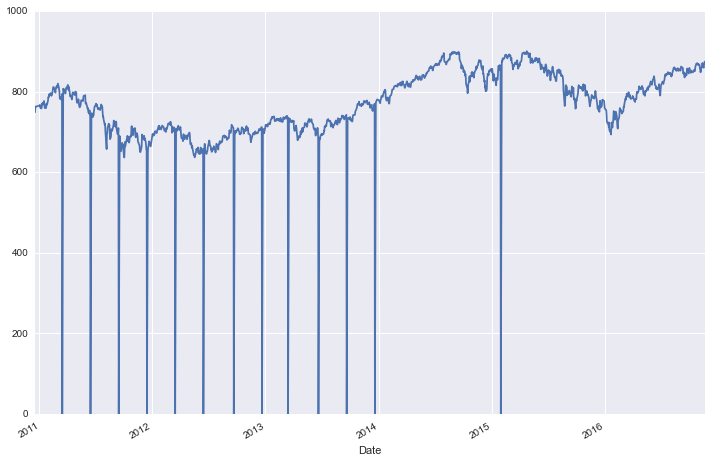

In [121]:
quandl.get("CHRIS/MX_SXF1", authtoken=token)['Last Price'].plot()